In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn import preprocessing

x = pd.read_pickle('../../data/preprocessed/merged/mergedX.pkl')
### Load Y and merge with X
y = pd.read_csv('../../data/preprocessed/merged/Y.csv')
y = y.merge(x, how='right', on='SEQN').drop(columns=[column for column in list(x) if column != 'SEQN'])
y = y.drop(columns=['Unnamed: 0'])
y = y.applymap(lambda x: int(x))

###
diseases = list(y.columns.values)
diseases.remove('SEQN')
count = {}
for disease in diseases:
    count[disease] = y[disease].sum()
sorted_count = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

other_disease = sorted_count[7:]
other_disease_count = sum([count[1] for count in other_disease])

common_diseases = sorted_count[:7]
common_disease_name = [cd[0] for cd in common_diseases]
y_most_common = y.loc[:, common_disease_name]


###
sensitive_variables = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4', 'DMDCITZN',
                       'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'SIALANG', 'SIAINTRP', 'FIALANG', 'FIAINTRP',
                       'MIALANG', 'MIAINTRP', 'AIALANGA', 'DMDHRGND', 'DMDHRBR4', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR']
age_and_gender_col_id = ['RIAGENDR', 'RIDAGEYR']

def encoding_string_labels(df):
    label_encoders = {}
    string_columns = df.select_dtypes(include=['object'])
    for column in string_columns:
        label_encoders[column] = preprocessing.LabelEncoder().fit(string_columns[column])
        df[column] = label_encoders[column].transform(string_columns[column])
    return df, label_encoders

x_encoded, x_encoding_labels = encoding_string_labels(x)

def compare_rf_model(data, labels, sensitive_vars):
    data_cleaned = data.drop(columns=sensitive_vars)
    scores = {}
    scores_cleaned = {}
    n_estimators = [5]
    max_depths = [50,75, 100]
    for n_estimator in n_estimators:
        for max_depth in max_depths:
            rfc = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, random_state=0, n_jobs=-1)
            scores[str(n_estimator) + ' ' + str(max_depth)] = cross_val_score(rfc, data[data.columns[1:]].as_matrix(),
                                                                              labels[labels.columns[1:]].as_matrix(),
                                                                              cv=5, scoring='f1_samples')
            scores_cleaned[str(n_estimator) + ' ' + str(max_depth)] = cross_val_score(rfc, data_cleaned[data_cleaned.columns[1:]].as_matrix(),
                                                                              labels[labels.columns[1:]].as_matrix(),
                                                                              cv=5, scoring='f1_samples')
    return scores, scores_cleaned

def compare_knn_model(data, labels, sensitive_vars):
    n_neighbors = [5]
    data_cleaned = data.drop(columns=sensitive_vars)
    scores = {}
    scores_cleaned = {}
    for n_neighbor in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors=n_neighbor, n_jobs=-1)
        scores[n_neighbor] = cross_val_score(knn, data[data.columns[1:]].as_matrix(),
                                                 labels[labels.columns[1:]].as_matrix(), cv=10, scoring='f1_samples')
        scores_cleaned[n_neighbor] = cross_val_score(knn, data_cleaned[data_cleaned.columns[1:]].as_matrix(),
                                             labels[labels.columns[1:]].as_matrix(), cv=10, scoring='f1_samples')
    return scores, scores_cleaned

def max_scores(scores):
    scores_sorted = sorted(list(scores.values()), key=lambda folds_score: folds_score.mean())
    return scores_sorted[0].mean(), scores_sorted[0].std() * 2






# model_most_common = ['Random Forest(max_depth = 50)', 'KNN(neighbor = 5)', 'Neural Network']
# performance_most_common = [0.30, 0.29, 0.57]
# error_most_common = [0.03, 0.06, 0.05]
# plt.xlabel('Model')
# plt.ylabel('F1 score')
# plt.errorbar(model_most_common, performance_most_common, error_most_common, linestyle='None', marker='^')
# plt.title('Models\' performance for most common disease')
# plt.plot()
# plt.show()


/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
scores_rf, scores_rf_cleaned = compare_rf_model(x, y, age_and_gender_col_id)
scores_knn, scores_knn_cleaned = compare_knn_model(x, y, age_and_gender_col_id)

/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cl

/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cl

/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
/home/tri/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cl

In [13]:
scores_sorted = sorted(list(scores_rf_cleaned.values()), key=lambda folds_score: folds_score.mean())
scores_sorted

[]

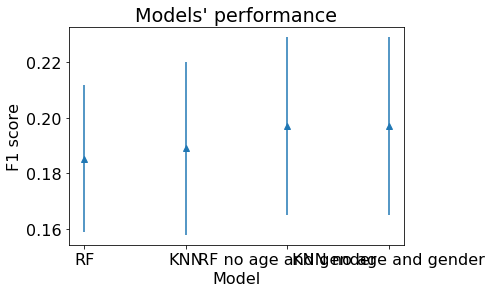

In [3]:
performance, error = zip(*[max_scores(scores_rf), max_scores(scores_rf_cleaned), max_scores(scores_knn), max_scores(scores_knn_cleaned)])

model = ['RF', 'KNN', 'RF no age and gender', 'KNN no age and gender']
plt.rcParams.update({'font.size': 16})
plt.xlabel('Model')
plt.ylabel('F1 score')
plt.errorbar(model, performance, error, linestyle='None', marker='^')
plt.title('Models\' performance')
plt.plot()
plt.show()

In [7]:
scores_disease_rf = {}

for disease in common_disease_name:
    rfc = RandomForestClassifier(n_estimators=5, max_depth=50, n_jobs=-1)
    scores_disease_rf[disease] = cross_val_score(rfc, x[x.columns[1:]].as_matrix(), y_most_common[disease].as_matrix(), cv=5)

for disease in scores_disease_rf:
    print("Disease: ", disease, "accuracy score: %0.2f (+/- %0.2f)" % (scores_disease_rf[disease].mean(), scores_disease_rf[disease].std() * 2))

Disease:  Dental Care accuracy score: 0.49 (+/- 0.04)
Disease:  Hypertension accuracy score: 0.49 (+/- 0.02)
Disease:  HighCholesterol accuracy score: 0.49 (+/- 0.04)
Disease:  Overweight accuracy score: 0.53 (+/- 0.05)
Disease:  Arthritis accuracy score: 0.58 (+/- 0.04)
Disease:  GenericProblem accuracy score: 0.64 (+/- 0.02)
Disease:  SinusInfection accuracy score: 0.65 (+/- 0.02)


In [8]:
x_no_a_g = x.drop(columns=age_and_gender_col_id)
x_no_sensitive = x.drop(columns=sensitive_variables)

scores_disease_rf_no_a_g = {}
scores_disease_rf_no_sensitive = {}

for disease in common_disease_name:
    rfc = RandomForestClassifier(n_estimators=5, max_depth=50, n_jobs=-1)
    scores_disease_rf_no_a_g[disease] = cross_val_score(rfc, x_no_a_g[x_no_a_g.columns[1:]].as_matrix(), y_most_common[disease].as_matrix(), cv=5)
    scores_disease_rf_no_sensitive[disease] = cross_val_score(rfc, x_no_sensitive[x_no_sensitive.columns[1:]].as_matrix(), y_most_common[disease].as_matrix(), cv=5)

for disease in scores_disease_rf_no_a_g:
    print("Disease: ", disease, "accuracy score: %0.2f (+/- %0.2f)" % (scores_disease_rf_no_a_g[disease].mean(), scores_disease_rf_no_a_g[disease].std() * 2))
for disease in scores_disease_rf_no_sensitive:
    print("Disease: ", disease, "accuracy score: %0.2f (+/- %0.2f)" % (scores_disease_rf_no_sensitive[disease].mean(), scores_disease_rf_no_sensitive[disease].std() * 2))

Disease:  Dental Care accuracy score: 0.50 (+/- 0.02)
Disease:  Hypertension accuracy score: 0.49 (+/- 0.05)
Disease:  HighCholesterol accuracy score: 0.50 (+/- 0.06)
Disease:  Overweight accuracy score: 0.54 (+/- 0.03)
Disease:  Arthritis accuracy score: 0.59 (+/- 0.02)
Disease:  GenericProblem accuracy score: 0.63 (+/- 0.02)
Disease:  SinusInfection accuracy score: 0.64 (+/- 0.04)
Disease:  Dental Care accuracy score: 0.50 (+/- 0.06)
Disease:  Hypertension accuracy score: 0.50 (+/- 0.02)
Disease:  HighCholesterol accuracy score: 0.49 (+/- 0.02)
Disease:  Overweight accuracy score: 0.53 (+/- 0.02)
Disease:  Arthritis accuracy score: 0.59 (+/- 0.03)
Disease:  GenericProblem accuracy score: 0.63 (+/- 0.03)
Disease:  SinusInfection accuracy score: 0.65 (+/- 0.01)


In [9]:
scores_disease_knn_no_a_g = {}
scores_disease_knn_no_sensitive = {}

for disease in common_disease_name:
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    scores_disease_knn_no_a_g[disease] = cross_val_score(knn, x_no_a_g[x_no_a_g.columns[1:]].as_matrix(), y_most_common[disease].as_matrix(), cv=5)
    scores_disease_knn_no_sensitive[disease] = cross_val_score(knn, x_no_sensitive[x_no_sensitive.columns[1:]].as_matrix(), y_most_common[disease].as_matrix(), cv=5)

for disease in scores_disease_knn_no_a_g:
    print("Disease: ", disease, "accuracy score: %0.2f (+/- %0.2f)" % (scores_disease_knn_no_a_g[disease].mean(), scores_disease_knn_no_a_g[disease].std() * 2))
for disease in scores_disease_knn_no_sensitive:
    print("Disease: ", disease, "accuracy score: %0.2f (+/- %0.2f)" % (scores_disease_knn_no_sensitive[disease].mean(), scores_disease_knn_no_sensitive[disease].std() * 2))

Disease:  Dental Care accuracy score: 0.50 (+/- 0.03)
Disease:  Hypertension accuracy score: 0.49 (+/- 0.04)
Disease:  HighCholesterol accuracy score: 0.50 (+/- 0.03)
Disease:  Overweight accuracy score: 0.54 (+/- 0.05)
Disease:  Arthritis accuracy score: 0.59 (+/- 0.03)
Disease:  GenericProblem accuracy score: 0.64 (+/- 0.02)
Disease:  SinusInfection accuracy score: 0.67 (+/- 0.02)
Disease:  Dental Care accuracy score: 0.50 (+/- 0.03)
Disease:  Hypertension accuracy score: 0.49 (+/- 0.04)
Disease:  HighCholesterol accuracy score: 0.50 (+/- 0.03)
Disease:  Overweight accuracy score: 0.54 (+/- 0.05)
Disease:  Arthritis accuracy score: 0.59 (+/- 0.03)
Disease:  GenericProblem accuracy score: 0.64 (+/- 0.02)
Disease:  SinusInfection accuracy score: 0.67 (+/- 0.02)


In [23]:
## investigating age 
original_ratio = {}
for disease in common_disease_name:
    y_disease = y[y[disease] == 1]
    n_male = 0
    n_female = 0
    for seqn in y_disease['SEQN'].as_matrix():
        if x[x['SEQN'] == seqn].iloc[0]['RIAGENDR'] == 1:
            n_male += 1
        else:
            n_female += 1
    original_ratio[disease] = n_male/y_disease.shape[0]
original_ratio

{'Arthritis': 0.3746425166825548,
 'Dental Care': 0.4886211512717537,
 'GenericProblem': 0.4410143329658214,
 'HighCholesterol': 0.4824016563146998,
 'Hypertension': 0.4505716207128447,
 'Overweight': 0.3946731234866828,
 'SinusInfection': 0.3294663573085847}

In [45]:
classifier_ratio = {}
for disease in common_disease_name:
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    knn.fit(x_no_sensitive[x_no_sensitive.columns[1:]].as_matrix(), y_most_common[disease].as_matrix())
    predicted = knn.predict(x_no_sensitive[x_no_sensitive.columns[1:]].as_matrix())
    n_male = 0
    n_patient = 0
    for idx in range(len(predicted)):
        if predicted[idx] == 1:
            n_patient += 1
            if x.iloc[idx]['RIAGENDR'] == 1:
                n_male += 1
            if x.iloc[idx]['RIAGENDR'] == 2:
                n_female += 1
    classifier_ratio[disease] = n_male/n_patient
    print(disease, n_patient, n_male, n_female)
classifier_ratio

Dental Care 1426 639 1365
Hypertension 1387 643 2109
HighCholesterol 1382 618 2873
Overweight 1049 456 3466
Arthritis 688 326 3828
GenericProblem 452 200 4080
SinusInfection 470 201 4349


{'Arthritis': 0.4738372093023256,
 'Dental Care': 0.4481065918653576,
 'GenericProblem': 0.4424778761061947,
 'HighCholesterol': 0.447178002894356,
 'Hypertension': 0.46359048305695744,
 'Overweight': 0.43469971401334606,
 'SinusInfection': 0.4276595744680851}